In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def get_data():
    train_df = np.genfromtxt("/home/oleksandr/ML/lab_1_test.csv", delimiter=",")
    test_df = np.genfromtxt("/home/oleksandr/ML/lab_1_train.csv", delimiter=",")
    return train_df[1:,1], train_df[1:,2], test_df[1:,1], test_df[1:,2]

In [51]:
train_x, train_y, test_x, test_y = get_data()

In [52]:
def data_visualization(train_x, train_y, test_x, test_y):
    plt.figure(figsize=(4, 3))
    plt.scatter(train_x, train_y)
    plt.title("Training set")
    plt.xlabel("Length")
    plt.ylabel("Width")
    

    plt.figure(figsize=(4, 3))
    plt.scatter(test_x, test_y)
    plt.title("Test set")
    plt.xlabel("Length")
    plt.ylabel("Width")

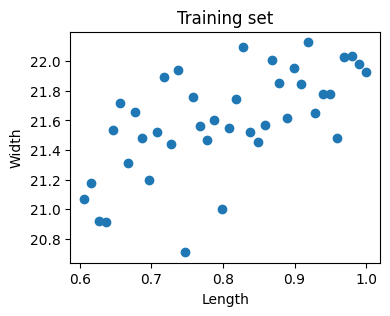

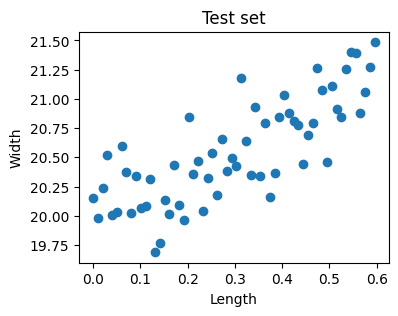

In [53]:
data_visualization(train_x, train_y, test_x, test_y)

In [54]:
def initialize_with_zeros():
    theta = 0
    b = 0
    return theta, b

In [55]:
def propagate(theta, b, X, Y):    
    m = X.shape[0]
  
    H = b + np.dot(theta, X)
    cost = (1/m)*np.sum((H-Y)**2)
  
    dt = (1/m)*np.dot(X, (H-Y).T)
    db = (1/m)*np.sum(H-Y)
    cost = np.squeeze(cost)
  
    grads = {"dt": dt,
             "db": db}
    
    return grads, cost

In [56]:
def optimize(theta, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(theta, b, X, Y)

        dt = grads["dt"]
        db = grads["db"]
        
        theta = theta - learning_rate*dt
        b = b - learning_rate*db
        costs.append(cost)
        print(f"After iteration {i} cost={cost}, theta={theta}, b={b}")

    params = {"theta": theta,
              "b": b}
    
    grads = {"dt": dt,
             "db": db}
    
    return params, grads, costs

In [57]:
def predict(theta, b, X):
    Y_prediction = b + np.dot(theta, X)
    return Y_prediction

In [58]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=10, learning_rate=0.1):
    theta, b = initialize_with_zeros()

    parameters, grads, costs = optimize(theta, b, X_train, Y_train, num_iterations, learning_rate)
    
    theta = parameters["theta"]
    b = parameters["b"]
    
    Y_prediction_test = predict(theta, b, X_test)
    Y_prediction_train = predict(theta, b, X_train)

    print ("Train MSE: {} ".format(np.mean((Y_prediction_train - Y_train) ** 2)))
    print ("Test MSE: {} ".format(np.mean((Y_prediction_test - Y_test) ** 2)))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "theta" : theta, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [59]:
d = model(train_x, train_y, test_x, test_y, num_iterations=100, learning_rate=1)

After iteration 0 cost=466.5842239391695, theta=17.369076581539016, b=21.597770325396755
After iteration 1 cost=197.88309819256747, theta=5.957764726694272, b=7.64987549476694
After iteration 2 cost=84.27241111830847, theta=13.260850108836829, b=16.813504711536204
After iteration 3 cost=36.230856928465826, theta=8.396523465243288, b=10.948905844058089
After iteration 4 cost=15.910706990082382, theta=11.44457896438186, b=14.855107542701388
After iteration 5 cost=7.310734796316971, theta=9.348834174482285, b=12.407426611574959
After iteration 6 cost=3.665955700099577, theta=10.598601247662751, b=14.090373185282193
After iteration 7 cost=2.116273979166754, theta=9.673998071365315, b=13.086772353788788
After iteration 8 cost=1.452498895872649, theta=10.164124712688972, b=13.8292567226337
After iteration 9 cost=1.1634076722729103, theta=9.735288441577561, b=13.435670177328339
After iteration 10 cost=1.0328637490026937, theta=9.904882716374052, b=13.78003869806932
After iteration 11 cost=0.9

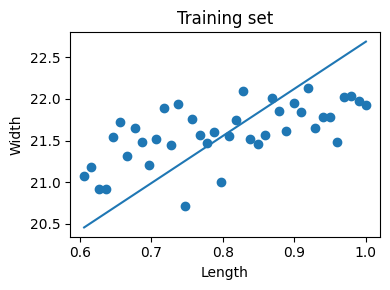

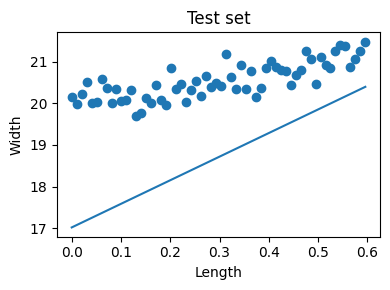

In [60]:
plt.figure(figsize=(4, 3))
plt.title("Training set")

plt.scatter(train_x, train_y)
x = np.array([min(train_x), max(train_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()


plt.figure(figsize=(4, 3))
plt.title("Test set")

plt.scatter(test_x, test_y)
x = np.array([min(test_x), max(test_x)])
theta = d["theta"]
b = d["b"]
y = theta * x + b
plt.plot(x, y)  
plt.axis("tight")
plt.xlabel("Length")
plt.ylabel("Width");
plt.tight_layout()